In [1]:
#url = "https://drive.google.com/uc?export=download&id=1EUTvQqqn0SdNJI2gfjDCGmiMCMHC5CXX"
#filename = wget.download(url, out="test.csv")
#filename
#df = pd.read_csv(filename, delimiter = ',')

In [1]:
!pip install imageio

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import matplotlib
matplotlib.use('Agg')

from azureml import Workspace
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.image as mpimg
import imageio
import numpy as np
from matplotlib import gridspec

In [4]:
ws = Workspace()
ds = ws.datasets['Bike Rental UCI dataset']
BIKE_DS = ds.to_dataframe()
BIKE_DS.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
BIKE_DS.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
SHORT_DS = BIKE_DS.loc[BIKE_DS.yr==1][['dteday', 'mnth','hr', 'casual', 'registered', 'yr']].copy()
SHORT_DS.loc[SHORT_DS['yr'] == 1, ['yr']] = 2012
SHORT_DS.loc[SHORT_DS['mnth'] == 1, ['mnth']] = 'ENE'
SHORT_DS.loc[SHORT_DS['mnth'] == 2, ['mnth']] = 'FEB'
SHORT_DS.loc[SHORT_DS['mnth'] == 3, ['mnth']] = 'MAR'
SHORT_DS.loc[SHORT_DS['mnth'] == 4, ['mnth']] = 'ABR'
SHORT_DS.loc[SHORT_DS['mnth'] == 5, ['mnth']] = 'MAY'
SHORT_DS.loc[SHORT_DS['mnth'] == 6, ['mnth']] = 'JUN'
SHORT_DS.loc[SHORT_DS['mnth'] == 7, ['mnth']] = 'JUL'
SHORT_DS.loc[SHORT_DS['mnth'] == 8, ['mnth']] = 'AGO'
SHORT_DS.loc[SHORT_DS['mnth'] == 9, ['mnth']] = 'SEP'
SHORT_DS.loc[SHORT_DS['mnth'] == 10, ['mnth']] = 'OCT'
SHORT_DS.loc[SHORT_DS['mnth'] == 11, ['mnth']] = 'NOV'
SHORT_DS.loc[SHORT_DS['mnth'] == 12, ['mnth']] = 'DIC'
SHORT_DS.rename(columns={'casual':'Ocasional', 'registered':'Registrados'},inplace=True)

SHORT_DS.mnth=pd.Categorical(SHORT_DS.mnth,categories=['DIC', 'NOV', 'OCT', 
                                                       'SEP', 'AGO', 'JUL', 
                                                       'JUN', 'MAY', 'ABR', 
                                                       'MAR', 'FEB', 'ENE'])
SHORT_DS=SHORT_DS.sort_values('mnth')

SHORT_DS.head()

,dteday,mnth,hr,Ocasional,Registrados,yr
17378,2012-12-31,DIC,23,12,37,2012
16888,2012-12-11,DIC,11,28,145,2012
16887,2012-12-11,DIC,10,12,142,2012
16886,2012-12-11,DIC,9,12,322,2012
16885,2012-12-11,DIC,8,16,708,2012


In [7]:
labelsX = np.arange(0, 19000, step=2000)

In [26]:
imgList = []
for year in [2012]:
    for hour in range(24):
        SUMMARIZED_DS = SHORT_DS.loc[(SHORT_DS.yr == year) & (SHORT_DS.hr == hour)]
        SUMMARIZED_DS = SUMMARIZED_DS.drop(['hr', 'yr'], axis=1)
        SUMMARIZED_DS = SUMMARIZED_DS.groupby(['mnth']).sum()
        
        fig = plt.figure(figsize=(10,5))
        gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
        ax = fig.add_subplot(gs[0])
        
        SUMMARIZED_DS.plot.barh(ax=ax, color=['b', (1,0.8,0.5)])
        plt.title("Usuarios utilizando el servicio de Capital Bike Share".format(year, hour))
        plt.xlabel("Usuarios")
        plt.ylabel("Mes")
        plt.xticks(labelsX)
        plt.legend(loc=4)

        #Add time
        ax = fig.add_subplot(gs[1])
        image = plt.imread('/home/nbuser/time-{}.png'.format(hour))
        ax.imshow(image)
        plt.axis('off')

        #Save file
        filename = "Y{}-H{}.png".format(year, hour)
        fig.savefig(filename)
        imgList.append(filename)
        
        #Clear cache
        fig.clf()
        plt.close(fig)
print("Trabajo terminado, generar la grÃ¡fica")     

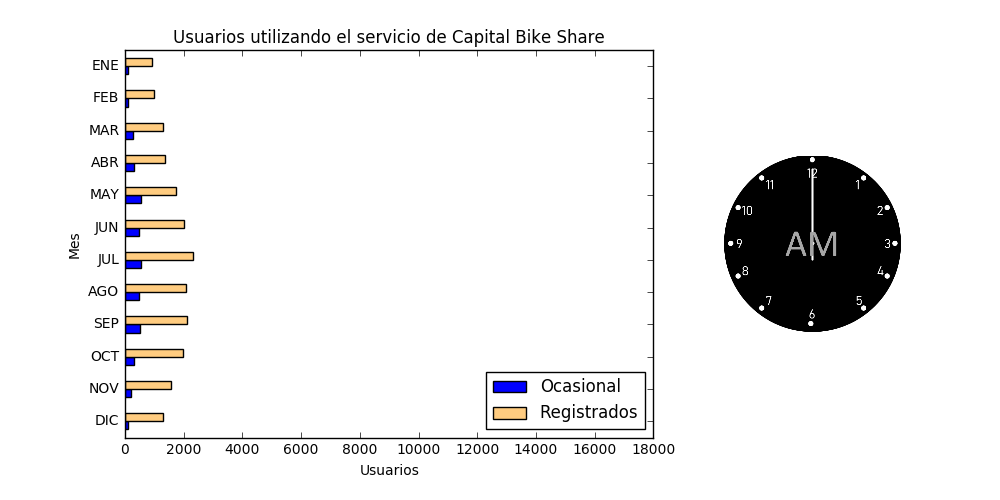

In [27]:
#Generate animation
images = []
animated_graph_filename = 'graph-animated.gif'

for filename in imgList:
    images.append(imageio.imread(filename))
imageio.mimsave(animated_graph_filename, images, format='GIF', duration=0.7)

#Display 
%matplotlib inline
from IPython.display import Image
with open(animated_graph_filename,'rb') as file:
    display(Image(file.read()), format='gif')

# UtilerÃ­as

import wget
url = "https://media1.tenor.com/images/1d00a4c684c373583b032063badb6de7/tenor.gif?itemid=14286764"
filename = wget.download(url, out="logo.gif")

In [25]:
import os 
for i in range(24):
    os.remove("/home/nbuser/time-{}.png".format(i))
    print ("Deleted: /home/nbuser/time-{}.png".format(i))

FileNotFoundError: [Errno 2] No such file or directory: '/home/nbuser/time-0.png'

In [6]:
import os
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk("/home/nbuser"):
    for file in f:
        if 'time-' in file and '.png' in file:
            print(os.path.join(r, file))

/home/nbuser/time-10.png
/home/nbuser/time-0.png
/home/nbuser/time-12.png
/home/nbuser/time-15.png
/home/nbuser/time-11.png
/home/nbuser/time-22.png
/home/nbuser/time-16.png
/home/nbuser/time-5.png
/home/nbuser/time-1.png
/home/nbuser/time-20.png
/home/nbuser/time-9.png
/home/nbuser/time-17.png
/home/nbuser/time-8.png
/home/nbuser/time-7.png
/home/nbuser/time-4.png
/home/nbuser/time-19.png
/home/nbuser/time-23.png
/home/nbuser/time-6.png
/home/nbuser/time-21.png
/home/nbuser/time-13.png
/home/nbuser/time-2.png
/home/nbuser/time-18.png
/home/nbuser/time-14.png
/home/nbuser/time-3.png
